<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_PCA_clustering_data_LuisVicent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

storenum OPENDATE date_super  conversion  ...       LON  MONTH DAY  YEAR
0         1   7/1/62     3/1/97         1.0  ... -94.07141      7   1  1962
1         2   8/1/64     3/1/96         1.0  ... -93.09345      8   1  1964
2         4   8/1/65     3/1/02         1.0  ... -94.50208      8   1  1965
3         8  10/1/67     3/1/93         1.0  ... -92.75858     10   1  1967
4         7  10/1/67        NaN         NaN  ... -92.30229     10   1  1967

[5 rows x 16 columns]

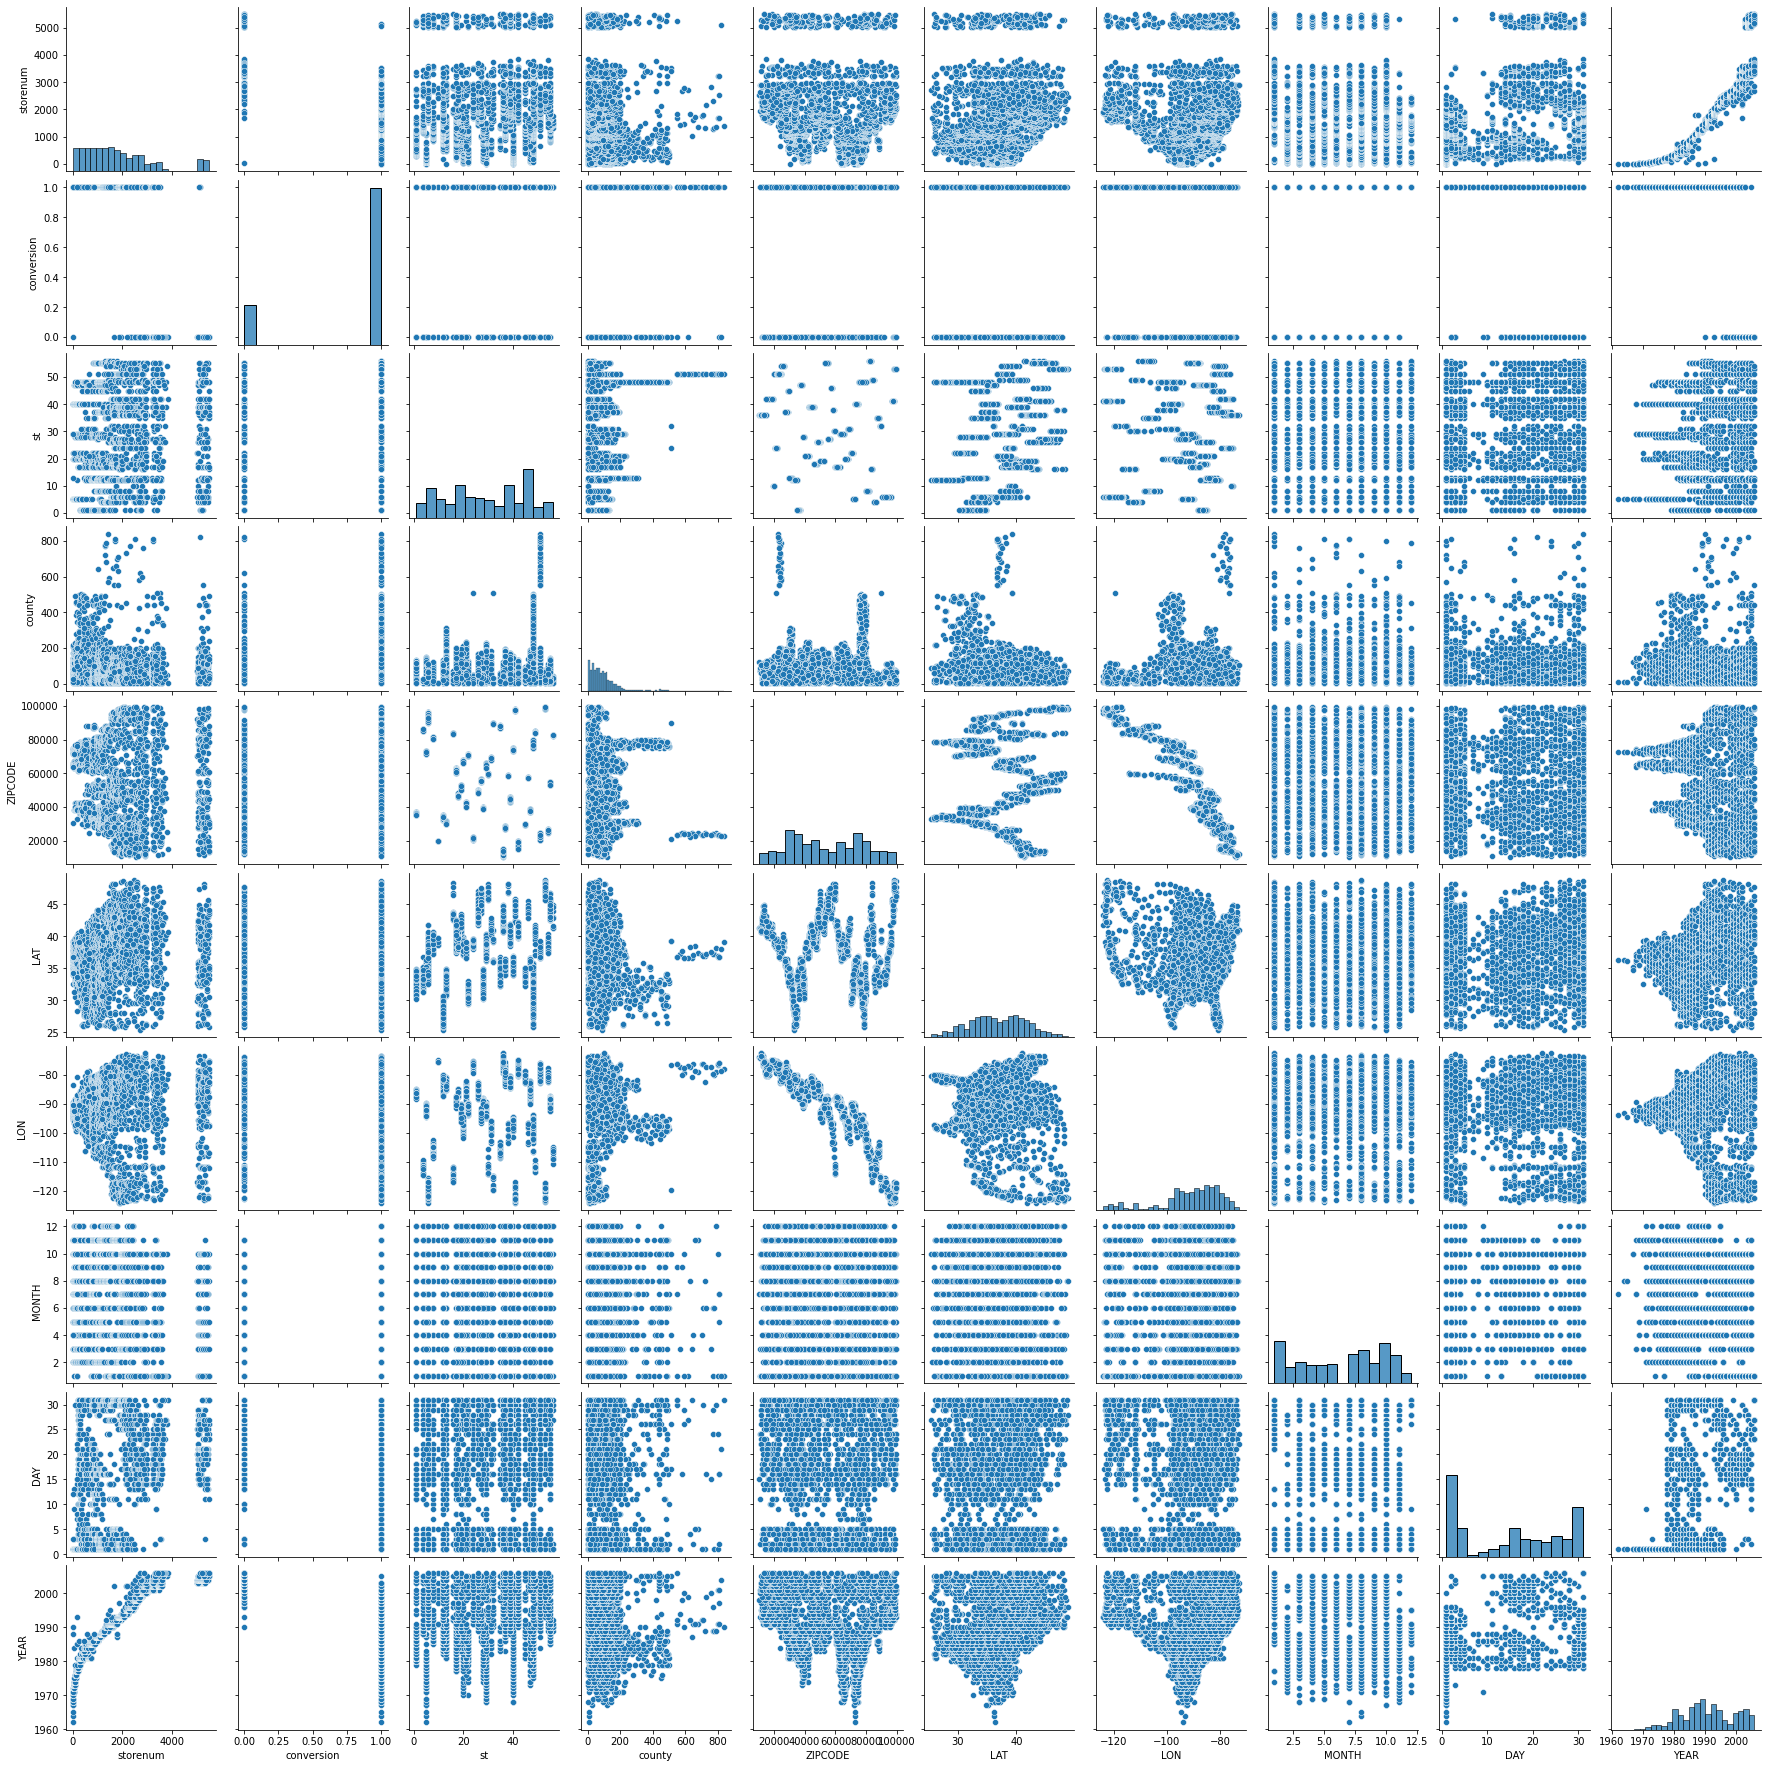

In [ ]:
import seaborn as sns
sns.pairplot(df)

datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)
varianza explicada acumulada =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]
Dimensionalidad datos en espacio PCA reducido = (1946, 7)


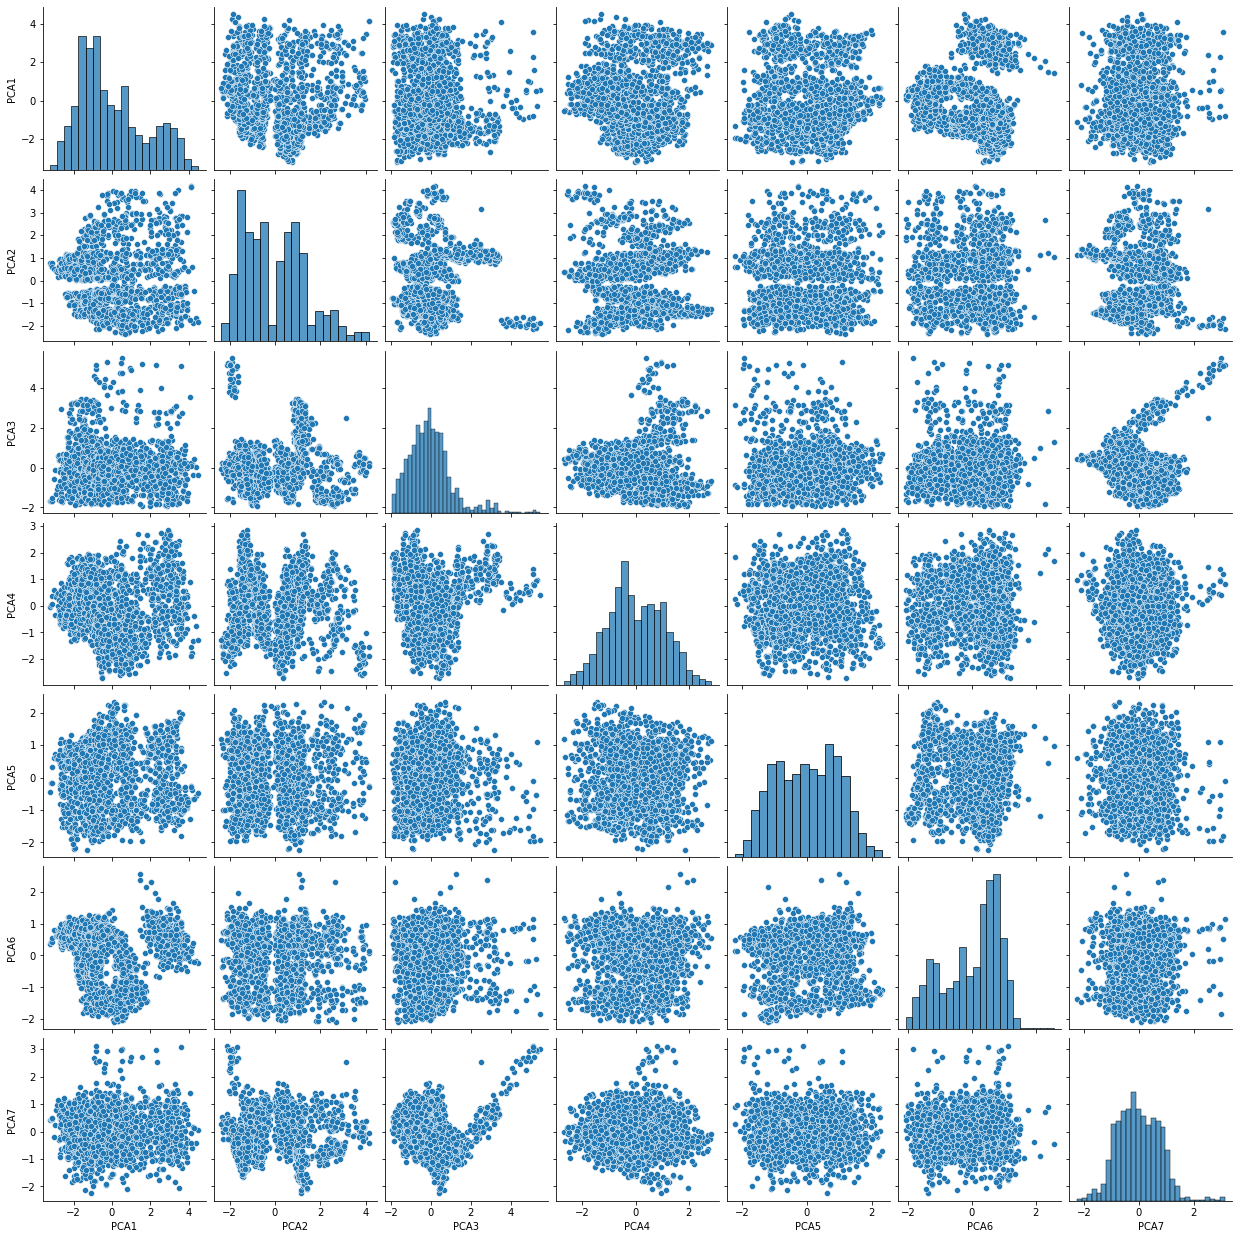

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')

df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

X = df_num_nonans
# y = mpg['origin'] # use origin as class label (not needed in PCA)

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = df_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 7 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
sns.pairplot(d)
plt.show()

In [ ]:
X.shape

(1946, 10)

**GMM clustering**

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df_num = df.select_dtypes(include='number') # keep only numeric variables 
#df_num.drop(['cylinders'],axis=1,inplace=True)
df = df_num.dropna() # remove observations with NaNs
X = np.array(df)

[176185.80671788298]
[176185.80671788298, 173417.60083018139]
[176185.80671788298, 173417.60083018139, 171286.41841796532]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035538665]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035538665, 167553.28931993907]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035538665, 167553.28931993907, 166341.81523918427]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035538665, 167553.28931993907, 166341.81523918427, 166183.12383418265]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035538665, 167553.28931993907, 166341.81523918427, 166183.12383418265, 166424.589484597]
[176185.80671788298, 173417.60083018139, 171286.41841796532, 150437.45902806733, 147587.95035

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 864x432 with 0 Axes>

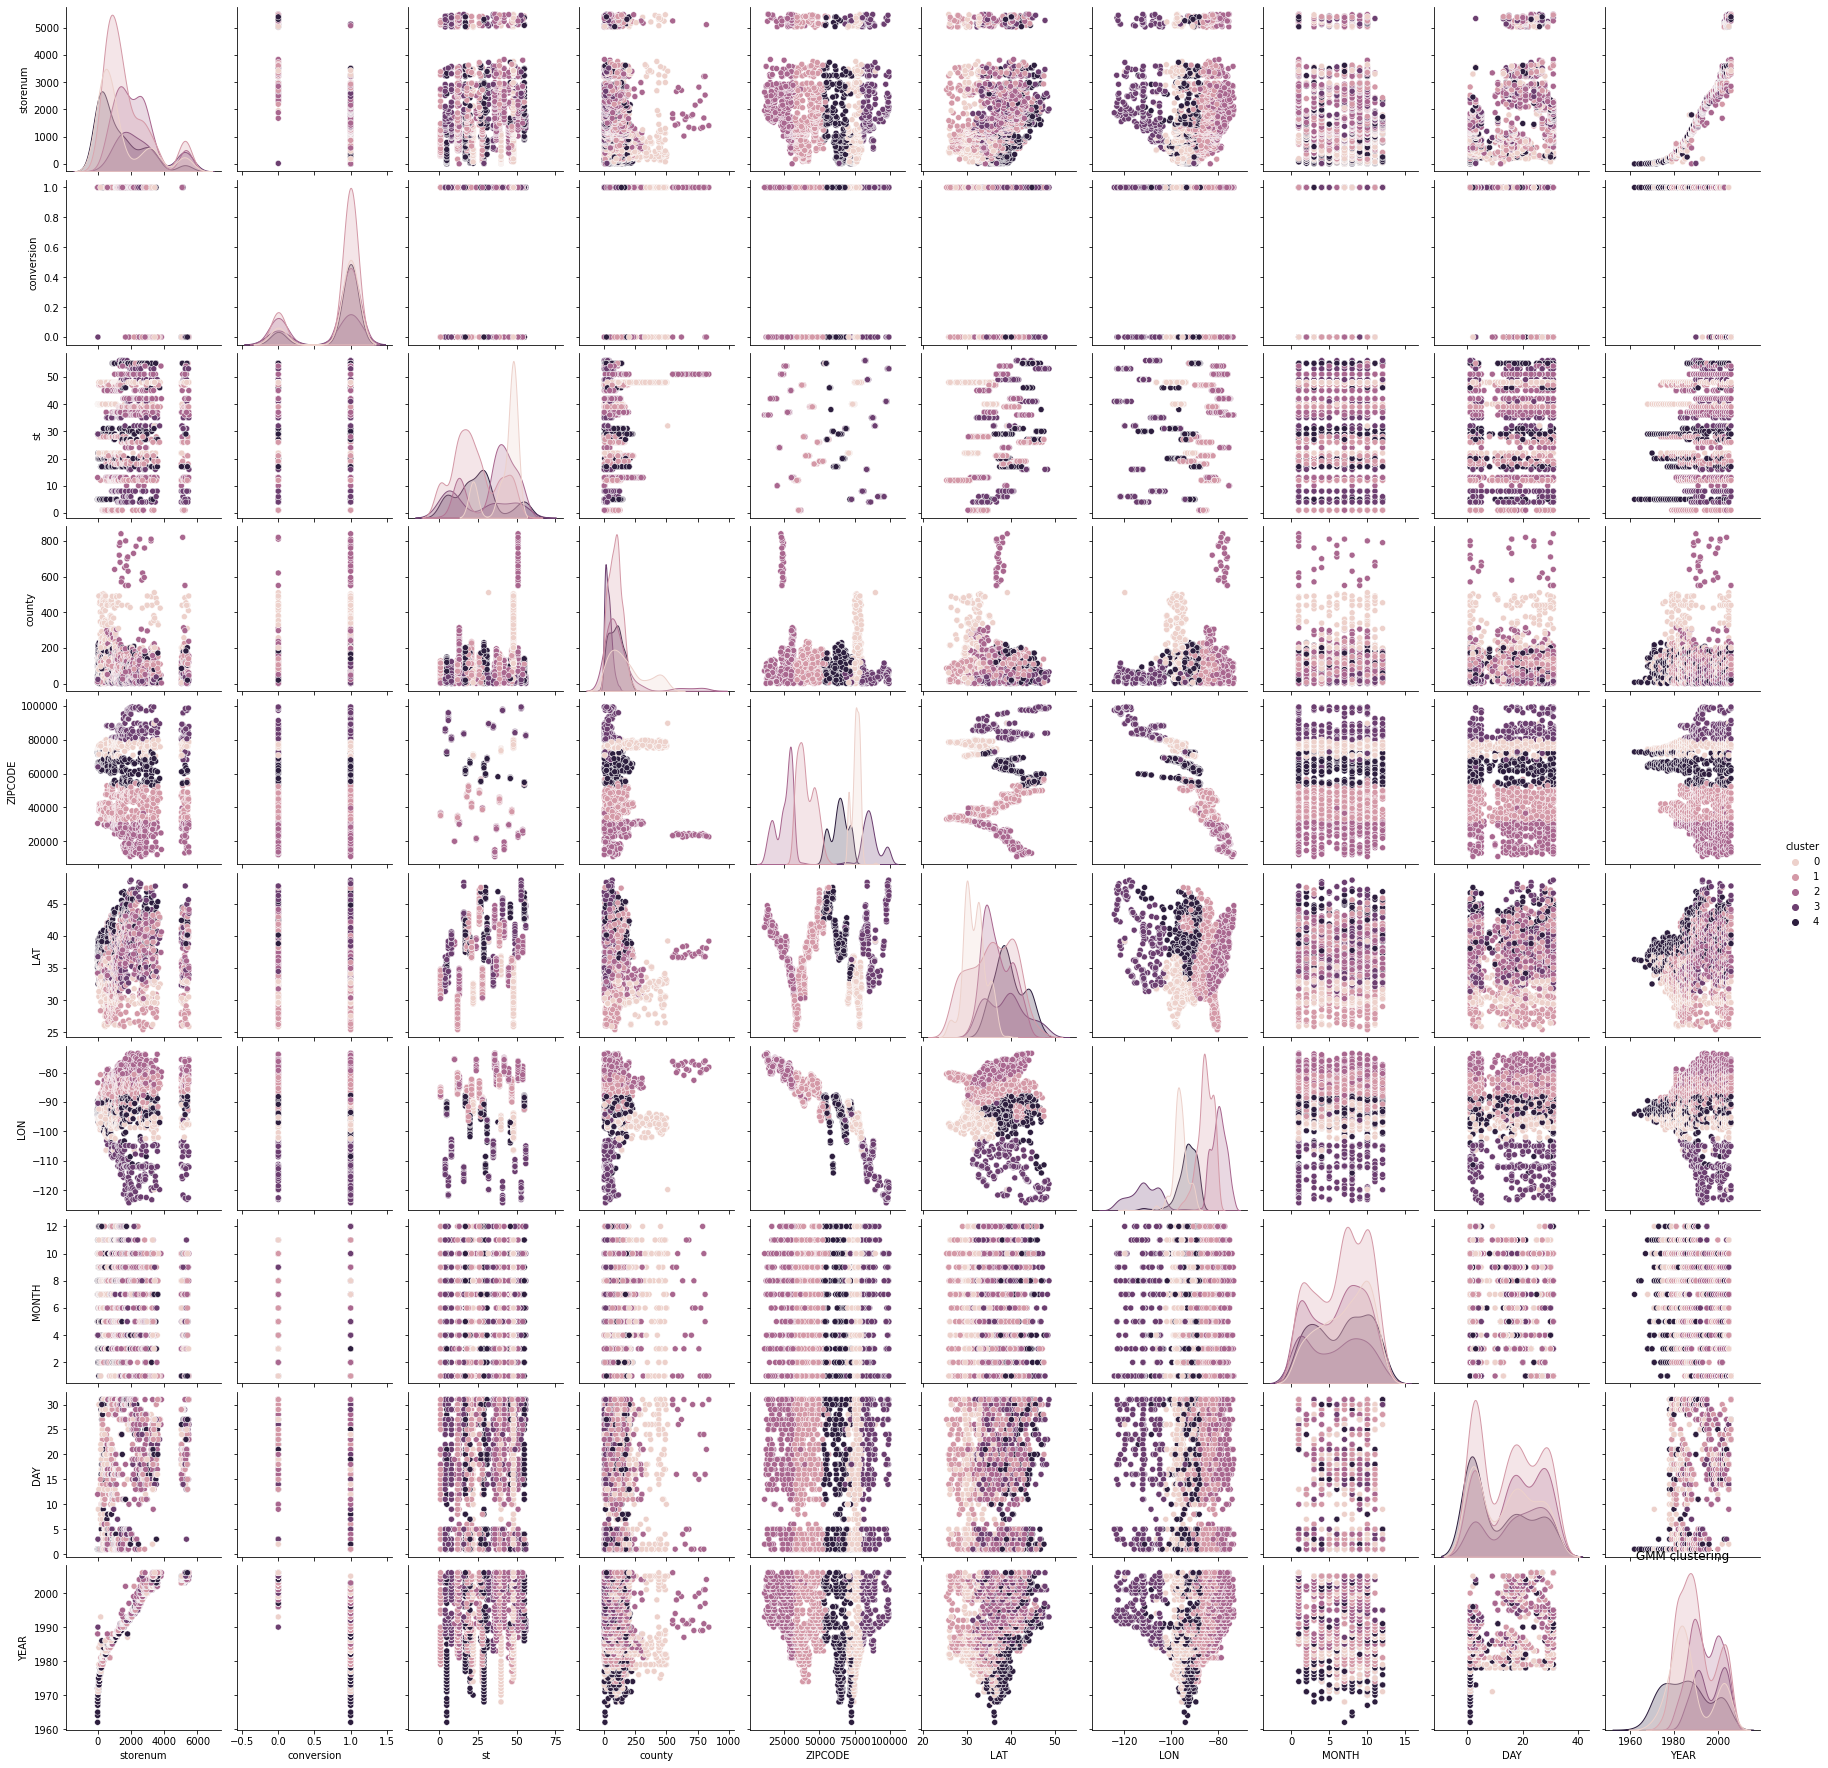

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
from sklearn import mixture
import matplotlib.pyplot as plt


NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

y_pred_gmm = gmm.fit_predict(X)

df['cluster'] = y_pred_gmm

fig = plt.figure(figsize=(12,6))
sns.pairplot(df,hue='cluster')
plt.title("GMM clustering")
plt.show()